<a href="https://colab.research.google.com/github/tjohanne42/time-series-project-simplon/blob/main/brief_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# I. Load data

## a) read_csv

In [145]:
df = pd.read_csv("energy_use_in_the_UK.csv", sep=";")
print(df.shape)
display(df.head())
display(df.info())

(796453, 6)


,timestamp,coal,nuclear,wind,hydro,solar
0,2012-01-01 00:00:01,8693,7121,2740,728,0.0
1,2012-01-01 00:05:06,8650,7120,2812,732,0.0
2,2012-01-01 00:10:01,8880,7125,2896,744,0.0
3,2012-01-01 00:15:01,9111,7122,2964,748,0.0
4,2012-01-01 00:20:01,9195,7114,2992,750,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796453 entries, 0 to 796452
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0    timestamp  796453 non-null  object 
 1    coal       796453 non-null  int64  
 2    nuclear    796453 non-null  int64  
 3    wind       796453 non-null  int64  
 4    hydro      796453 non-null  int64  
 5    solar      796453 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 36.5+ MB


None

## b) remove space in cols, timestamp to datetime

In [146]:
if df.columns[0][0] == " ":
  df = df.rename(columns=lambda x: x[1:])
df["timestamp"] = pd.to_datetime(df["timestamp"])

## c) plot values

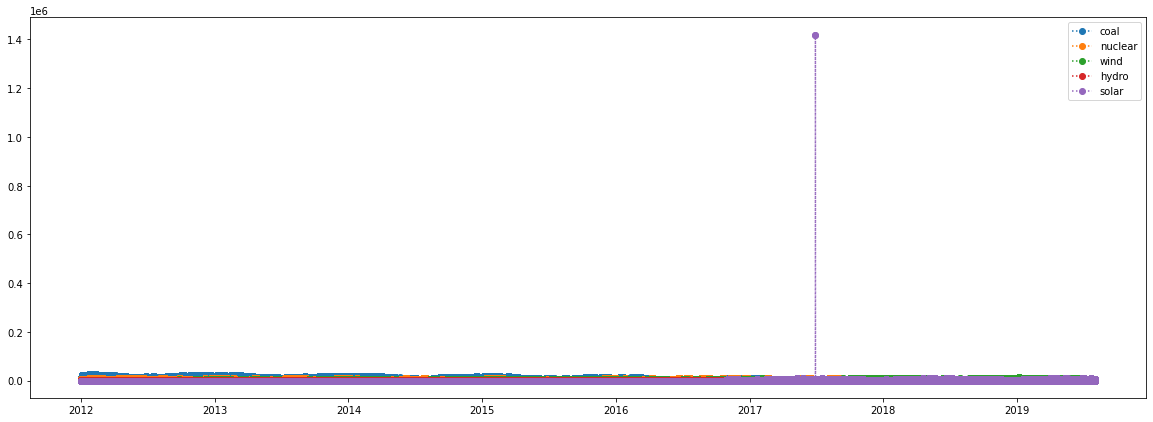

In [147]:
plt.figure(figsize=(20,7))
for col in df.columns[1:]:
    plt.plot(df["timestamp"], df[col], "o:", label=col)
plt.legend()
plt.show()

## d) remove solar outlayers

In [148]:
print(df["solar"].max())
idx = np.argmax(df["solar"])
print(idx)

1420000.0
576229


In [149]:
display(df.iloc[idx-5:idx+5])
df["solar"][576229] = np.nan
df["solar"][576230] = np.nan
df["solar"] = df["solar"].interpolate()
display(df.iloc[idx-5:idx+5])

,timestamp,coal,nuclear,wind,hydro,solar
576224,2017-06-29 15:10:31,1572,7946,4584,367,1560.0
576225,2017-06-29 15:15:32,1572,7946,4584,367,1580.0
576226,2017-06-29 15:20:32,1572,7946,4584,367,1580.0
576227,2017-06-29 15:25:32,1572,7946,4584,367,1570.0
576228,2017-06-29 15:30:31,1572,7946,4584,367,1570.0
576229,2017-06-29 15:35:32,1572,7946,4584,367,1420000.0
576230,2017-06-29 15:40:33,1572,7946,4584,367,1420000.0
576231,2017-06-29 15:45:33,1572,7946,4584,367,1450.0
576232,2017-06-29 15:50:31,1572,7946,4584,367,1450.0
576233,2017-06-29 15:55:31,1572,7946,4584,367,1450.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,timestamp,coal,nuclear,wind,hydro,solar
576224,2017-06-29 15:10:31,1572,7946,4584,367,1560.0
576225,2017-06-29 15:15:32,1572,7946,4584,367,1580.0
576226,2017-06-29 15:20:32,1572,7946,4584,367,1580.0
576227,2017-06-29 15:25:32,1572,7946,4584,367,1570.0
576228,2017-06-29 15:30:31,1572,7946,4584,367,1570.0
576229,2017-06-29 15:35:32,1572,7946,4584,367,1530.0
576230,2017-06-29 15:40:33,1572,7946,4584,367,1490.0
576231,2017-06-29 15:45:33,1572,7946,4584,367,1450.0
576232,2017-06-29 15:50:31,1572,7946,4584,367,1450.0
576233,2017-06-29 15:55:31,1572,7946,4584,367,1450.0


## e) plot values

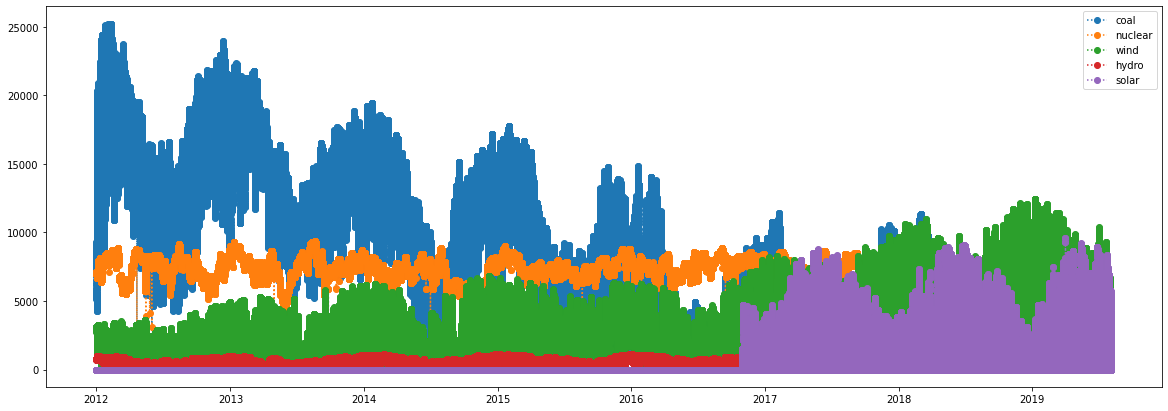

In [150]:
plt.figure(figsize=(20,7))
for col in df.columns[1:]:
    plt.plot(df["timestamp"], df[col], "o:", label=col)
plt.legend()
plt.show()

## f) show nb values by ("hour", "day", "month", "year")

In [151]:
tmp = df.copy()

tmp = tmp.drop_duplicates().reset_index(drop=True)

date_col = "timestamp"

# hour
tmp[date_col] = tmp[date_col].map(lambda x: datetime(x.year, x.month, x.day, x.hour, 0, 0))
# # day
# tmp[date_col] = tmp[date_col].map(lambda x: datetime(x.year, x.month, x.day, 0, 0, 0))
# # month
# tmp[date_col] = tmp[date_col].map(lambda x: datetime(x.year, x.month, 1, 0, 0, 0))
# # year
# tmp[date_col] = tmp[date_col].map(lambda x: datetime(x.year, 1, 1, 0, 0, 0))

ret = tmp.groupby([date_col], axis=0, as_index=False).count()
print(ret['coal'].value_counts())

12    66064
11      155
10       67
13       33
9        29
8        24
7        14
6        13
3         9
1         8
4         7
5         5
2         4
14        3
19        1
15        1
16        1
22        1
Name: coal, dtype: int64


## g) groupby hour dataframe (mean)

As we don't have same numbers of values for each hour, we can't sum this values  
We're gonna calculate the mean of each value per hour

shape: (66439, 6)


,timestamp,coal,nuclear,wind,hydro,solar
0,2012-01-01 00:00:00,8962.083333,7057.083333,2992.916667,747.583333,0.0
1,2012-01-01 01:00:00,8596.166667,6942.750000,2972.833333,759.000000,0.0
2,2012-01-01 02:00:00,7701.250000,6944.916667,2934.250000,748.083333,0.0
3,2012-01-01 03:00:00,6199.083333,6944.750000,2971.166667,746.000000,0.0
4,2012-01-01 04:00:00,5361.083333,7021.250000,3002.000000,745.000000,0.0


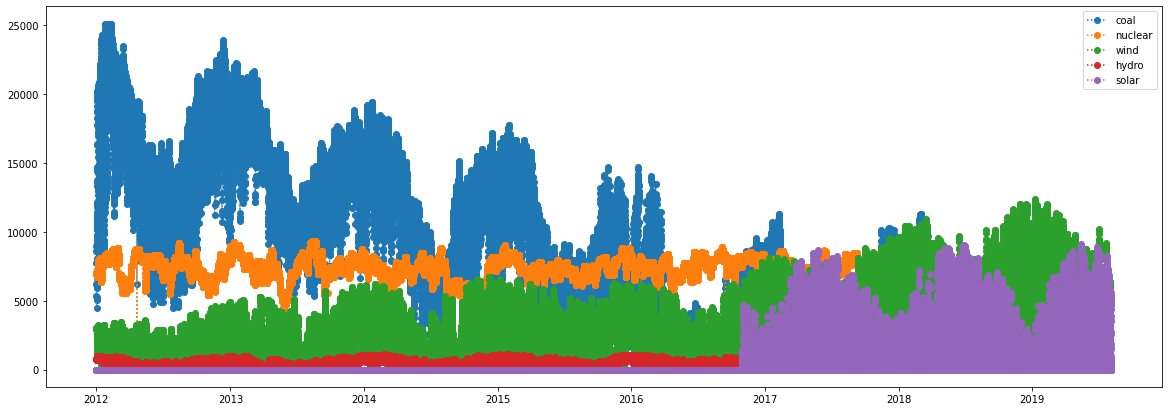

In [152]:
df = df.drop_duplicates().reset_index(drop=True)

date_col = "timestamp"

# hour
df[date_col] = df[date_col].map(lambda x: datetime(x.year, x.month, x.day, x.hour, 0, 0))
# # day
# tmp[date_col] = tmp[date_col].map(lambda x: datetime(x.year, x.month, x.day, 0, 0, 0))
# # month
# tmp[date_col] = tmp[date_col].map(lambda x: datetime(x.year, x.month, 1, 0, 0, 0))
# # year
# tmp[date_col] = tmp[date_col].map(lambda x: datetime(x.year, 1, 1, 0, 0, 0))

df = df.groupby([date_col], axis=0, as_index=False).mean()
print("shape:", df.shape)
display(df.head())

plt.figure(figsize=(20,7))
for col in df.columns[1:]:
    plt.plot(df["timestamp"], df[col], "o:", label=col)
plt.legend()
plt.show()

# h) fill missing hours

In [153]:
tmp = df.copy()

date_col = "timestamp"

# # hour
# tmp[date_col] = tmp[date_col].map(lambda x: datetime(x.year, x.month, x.day, x.hour, 0, 0))
# day
tmp[date_col] = tmp[date_col].map(lambda x: datetime(x.year, x.month, x.day, 0, 0, 0))
# 2012-01-01
# # month
# tmp[date_col] = tmp[date_col].map(lambda x: datetime(x.year, x.month, 1, 0, 0, 0))
# # year
# tmp[date_col] = tmp[date_col].map(lambda x: datetime(x.year, 1, 1, 0, 0, 0))

ret = tmp.groupby([date_col], axis=0, as_index=False).count()
print("nb days with x values:")
print(ret['coal'].value_counts())

first_date = df["timestamp"][0]
last_date = df["timestamp"][df.shape[0] - 1]
print("nb days expected:", (last_date - first_date).days + 1)
print("nb days actual:", ret.shape[0])

nb days with x values:
24    2752
23       5
21       5
16       4
14       2
19       1
22       1
20       1
18       1
Name: coal, dtype: int64
nb days expected: 2772
nb days actual: 2772


In [154]:
dates = ret[ret["coal"] != 24]["timestamp"].values
dates

array(['2012-11-28T00:00:00.000000000', '2013-02-02T00:00:00.000000000',
       '2013-04-03T00:00:00.000000000', '2013-07-13T00:00:00.000000000',
       '2013-07-14T00:00:00.000000000', '2014-03-26T00:00:00.000000000',
       '2014-07-25T00:00:00.000000000', '2014-11-19T00:00:00.000000000',
       '2014-12-08T00:00:00.000000000', '2015-07-22T00:00:00.000000000',
       '2015-07-23T00:00:00.000000000', '2016-01-20T00:00:00.000000000',
       '2016-01-21T00:00:00.000000000', '2016-09-12T00:00:00.000000000',
       '2016-09-13T00:00:00.000000000', '2016-09-26T00:00:00.000000000',
       '2017-01-21T00:00:00.000000000', '2018-03-06T00:00:00.000000000',
       '2018-11-22T00:00:00.000000000', '2019-08-03T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [155]:
df["timestamp_day"] = df["timestamp"].map(lambda x: datetime(x.year, x.month, x.day, 0, 0, 0))
df["original_data"] = True

In [156]:
data = {
  "timestamp": [],
}

for date in dates:
  date = pd.to_datetime(date)
  tmp = df[df["timestamp_day"] == date]
  display(tmp)
  for hour in range(0, 24):
    if not np.any(tmp["timestamp"].dt.hour == hour):
      data["timestamp"].append(datetime(date.year, date.month, date.day, hour, 0, 0))
      print(hour)


data["original_data"] = False

df = df.append(pd.DataFrame(data=data))
df = df.sort_values(by="timestamp" ).reset_index(drop=True)

display(df)

,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
7968,2012-11-28 00:00:00,16495.333333,7165.750000,2608.916667,354.083333,0.0,2012-11-28,True
7969,2012-11-28 01:00:00,16279.416667,7170.750000,2570.416667,319.750000,0.0,2012-11-28,True
7970,2012-11-28 02:00:00,15495.750000,7166.083333,2387.833333,298.916667,0.0,2012-11-28,True
7971,2012-11-28 03:00:00,14991.750000,7171.833333,2448.416667,295.666667,0.0,2012-11-28,True
7972,2012-11-28 04:00:00,14548.000000,7173.833333,2379.500000,296.083333,0.0,2012-11-28,True
7973,2012-11-28 05:00:00,16142.583333,7181.166667,2374.333333,325.083333,0.0,2012-11-28,True
7974,2012-11-28 06:00:00,17959.250000,7191.666667,2193.666667,360.916667,0.0,2012-11-28,True
7975,2012-11-28 07:00:00,20654.583333,7197.416667,2139.416667,504.083333,0.0,2012-11-28,True
7976,2012-11-28 08:00:00,21429.916667,7199.666667,2081.500000,532.250000,0.0,2012-11-28,True
7977,2012-11-28 09:00:00,21542.166667,7205.750000,1948.833333,527.750000,0.0,2012-11-28,True


19


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
9551,2013-02-02 00:00:00,16949.416667,8356.166667,2560.000000,390.750000,0.0,2013-02-02,True
9552,2013-02-02 01:00:00,16973.083333,8196.500000,2761.416667,355.083333,0.0,2013-02-02,True
9553,2013-02-02 02:00:00,16323.727273,8173.727273,2890.454545,345.454545,0.0,2013-02-02,True
9554,2013-02-02 03:00:00,16494.000000,8180.000000,2907.000000,344.000000,0.0,2013-02-02,True
9555,2013-02-02 09:00:00,18986.000000,8187.000000,2575.000000,594.333333,0.0,2013-02-02,True
9556,2013-02-02 10:00:00,19051.500000,8194.666667,2436.500000,594.000000,0.0,2013-02-02,True
9557,2013-02-02 11:00:00,18978.916667,8188.833333,2523.916667,608.583333,0.0,2013-02-02,True
9558,2013-02-02 12:00:00,18977.833333,8170.666667,2439.500000,611.416667,0.0,2013-02-02,True
9559,2013-02-02 13:00:00,18789.083333,8169.083333,2258.916667,446.166667,0.0,2013-02-02,True
9560,2013-02-02 14:00:00,18744.750000,8170.000000,1970.583333,419.666667,0.0,2013-02-02,True


4
5
6
7
8


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
10986,2013-04-03 00:00:00,16220.250000,7783.583333,1744.583333,25.000000,0.0,2013-04-03,True
10987,2013-04-03 01:00:00,16826.000000,7781.416667,1614.083333,25.000000,0.0,2013-04-03,True
10988,2013-04-03 02:00:00,16933.166667,7777.250000,1452.083333,25.000000,0.0,2013-04-03,True
10989,2013-04-03 03:00:00,16969.000000,7774.666667,1299.916667,24.583333,0.0,2013-04-03,True
10990,2013-04-03 04:00:00,16639.000000,7775.583333,1686.583333,51.750000,0.0,2013-04-03,True
10991,2013-04-03 05:00:00,17204.454545,7773.636364,1869.181818,56.000000,0.0,2013-04-03,True
10992,2013-04-03 10:00:00,17613.727273,7789.090909,2021.636364,122.727273,0.0,2013-04-03,True
10993,2013-04-03 11:00:00,17345.416667,7775.666667,1978.333333,107.916667,0.0,2013-04-03,True
10994,2013-04-03 12:00:00,17382.000000,7775.750000,1886.750000,78.583333,0.0,2013-04-03,True
10995,2013-04-03 13:00:00,17326.666667,7775.166667,1913.833333,78.583333,0.0,2013-04-03,True


6
7
8
9


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
13406,2013-07-13 00:00:00,10275.666667,7937.500000,262.333333,61.916667,0.0,2013-07-13,True
13407,2013-07-13 01:00:00,9894.583333,7937.833333,300.583333,59.000000,0.0,2013-07-13,True
13408,2013-07-13 02:00:00,9925.250000,7797.166667,280.833333,59.000000,0.0,2013-07-13,True
13409,2013-07-13 03:00:00,9459.666667,7763.833333,375.750000,58.666667,0.0,2013-07-13,True
13410,2013-07-13 04:00:00,8906.416667,7787.416667,411.500000,58.166667,0.0,2013-07-13,True
13411,2013-07-13 05:00:00,9458.416667,7860.166667,298.250000,58.250000,0.0,2013-07-13,True
13412,2013-07-13 06:00:00,10101.666667,7995.000000,184.583333,97.083333,0.0,2013-07-13,True
13413,2013-07-13 07:00:00,11391.000000,7996.500000,140.833333,113.250000,0.0,2013-07-13,True
13414,2013-07-13 08:00:00,11414.083333,7992.750000,151.833333,412.500000,0.0,2013-07-13,True
13415,2013-07-13 09:00:00,11453.333333,7992.833333,204.583333,419.500000,0.0,2013-07-13,True


16
17
18
19
20
21
22
23


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
13422,2013-07-14 01:00:00,9421.166667,7879.333333,199.666667,45.333333,0.0,2013-07-14,True
13423,2013-07-14 02:00:00,9324.333333,8008.250000,156.500000,40.000000,0.0,2013-07-14,True
13424,2013-07-14 03:00:00,8756.000000,8049.250000,185.750000,39.500000,0.0,2013-07-14,True
13425,2013-07-14 04:00:00,8705.333333,8061.083333,226.166667,38.000000,0.0,2013-07-14,True
13426,2013-07-14 05:00:00,8730.916667,8130.000000,216.250000,38.000000,0.0,2013-07-14,True
13427,2013-07-14 06:00:00,9723.416667,8170.416667,262.250000,78.583333,0.0,2013-07-14,True
13428,2013-07-14 07:00:00,10176.250000,8168.583333,296.166667,85.583333,0.0,2013-07-14,True
13429,2013-07-14 08:00:00,10694.583333,8156.500000,302.000000,205.416667,0.0,2013-07-14,True
13430,2013-07-14 09:00:00,10980.750000,8164.083333,373.500000,243.666667,0.0,2013-07-14,True
13431,2013-07-14 10:00:00,11103.916667,8159.166667,486.833333,247.166667,0.0,2013-07-14,True


0


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
19541,2014-03-26 00:00:00,14725.166667,7391.000000,1156.166667,684.500000,0.0,2014-03-26,True
19542,2014-03-26 01:00:00,14815.333333,7400.916667,1021.583333,660.083333,0.0,2014-03-26,True
19543,2014-03-26 02:00:00,14570.000000,7400.416667,858.916667,650.500000,0.0,2014-03-26,True
19544,2014-03-26 03:00:00,14062.916667,7407.000000,869.750000,648.500000,0.0,2014-03-26,True
19545,2014-03-26 04:00:00,13665.916667,7277.250000,1074.666667,648.750000,0.0,2014-03-26,True
19546,2014-03-26 05:00:00,14297.416667,7224.833333,1249.333333,648.083333,0.0,2014-03-26,True
19547,2014-03-26 06:00:00,14089.500000,7225.916667,1216.750000,662.750000,0.0,2014-03-26,True
19548,2014-03-26 07:00:00,15342.000000,7253.000000,1315.000000,684.750000,0.0,2014-03-26,True
19549,2014-03-26 09:00:00,16068.142857,7403.714286,1633.571429,771.857143,0.0,2014-03-26,True
19550,2014-03-26 10:00:00,16060.000000,7396.500000,1445.000000,810.500000,0.0,2014-03-26,True


8


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
22444,2014-07-25 00:00:00,3544.428571,8280.857143,1007.285714,18.000000,0.0,2014-07-25,True
22445,2014-07-25 04:00:00,3200.666667,8063.000000,587.666667,18.000000,0.0,2014-07-25,True
22446,2014-07-25 05:00:00,3826.666667,8068.416667,705.666667,18.000000,0.0,2014-07-25,True
22447,2014-07-25 06:00:00,4962.500000,8065.666667,663.166667,62.250000,0.0,2014-07-25,True
22448,2014-07-25 07:00:00,5856.166667,8070.833333,526.166667,98.083333,0.0,2014-07-25,True
22449,2014-07-25 08:00:00,6736.083333,8072.750000,437.000000,249.250000,0.0,2014-07-25,True
22450,2014-07-25 09:00:00,6521.083333,8239.500000,428.333333,275.416667,0.0,2014-07-25,True
22451,2014-07-25 10:00:00,6570.666667,8285.333333,392.250000,298.000000,0.0,2014-07-25,True
22452,2014-07-25 11:00:00,6785.250000,8274.916667,366.500000,276.333333,0.0,2014-07-25,True
22453,2014-07-25 12:00:00,6800.333333,8278.500000,351.583333,181.000000,0.0,2014-07-25,True


1
2
3


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
25249,2014-11-19 00:00:00,13099.583333,5220.250000,2171.083333,455.833333,0.0,2014-11-19,True
25250,2014-11-19 01:00:00,13123.333333,5218.833333,2218.083333,369.750000,0.0,2014-11-19,True
25251,2014-11-19 02:00:00,12371.000000,5219.666667,2128.000000,337.250000,0.0,2014-11-19,True
25252,2014-11-19 03:00:00,11747.083333,5219.833333,1926.250000,320.166667,0.0,2014-11-19,True
25253,2014-11-19 04:00:00,11547.333333,5224.583333,1651.083333,316.666667,0.0,2014-11-19,True
25254,2014-11-19 05:00:00,12537.000000,5229.000000,1577.375000,312.875000,0.0,2014-11-19,True
25255,2014-11-19 09:00:00,15365.750000,5230.250000,1784.500000,505.750000,0.0,2014-11-19,True
25256,2014-11-19 10:00:00,15331.416667,5223.500000,1807.083333,514.083333,0.0,2014-11-19,True
25257,2014-11-19 11:00:00,15324.250000,5223.333333,1836.333333,515.333333,0.0,2014-11-19,True
25258,2014-11-19 12:00:00,15306.500000,5229.000000,1636.916667,516.833333,0.0,2014-11-19,True


6
7
8


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
25702,2014-12-08 00:00:00,10333.416667,7686.250000,5299.500000,343.000000,0.0,2014-12-08,True
25703,2014-12-08 01:00:00,10101.500000,7834.083333,5090.250000,310.500000,0.0,2014-12-08,True
25704,2014-12-08 02:00:00,9729.000000,7839.916667,5105.666667,305.333333,0.0,2014-12-08,True
25705,2014-12-08 03:00:00,9333.083333,7839.250000,5135.500000,294.750000,0.0,2014-12-08,True
25706,2014-12-08 04:00:00,9601.166667,7834.583333,5005.083333,280.416667,0.0,2014-12-08,True
25707,2014-12-08 05:00:00,10268.666667,7842.166667,4854.916667,281.666667,0.0,2014-12-08,True
25708,2014-12-08 06:00:00,11690.000000,7815.750000,5115.416667,292.666667,0.0,2014-12-08,True
25709,2014-12-08 07:00:00,13600.000000,7637.500000,5106.250000,586.166667,0.0,2014-12-08,True
25710,2014-12-08 08:00:00,14346.583333,7135.916667,5122.750000,600.500000,0.0,2014-12-08,True
25711,2014-12-08 09:00:00,14429.750000,7095.500000,5229.416667,652.250000,0.0,2014-12-08,True


19
20


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
31124,2015-07-22 00:00:00,5712.166667,7140.750000,1451.083333,360.416667,0.0,2015-07-22,True
31125,2015-07-22 01:00:00,5592.000000,7130.250000,1227.250000,357.833333,0.0,2015-07-22,True
31126,2015-07-22 02:00:00,5431.500000,7122.833333,1140.916667,356.916667,0.0,2015-07-22,True
31127,2015-07-22 03:00:00,5546.750000,7128.750000,1080.250000,356.416667,0.0,2015-07-22,True
31128,2015-07-22 04:00:00,5861.916667,7127.750000,1032.333333,382.416667,0.0,2015-07-22,True
31129,2015-07-22 05:00:00,6471.416667,7134.250000,822.500000,393.333333,0.0,2015-07-22,True
31130,2015-07-22 06:00:00,7261.916667,7133.083333,697.500000,447.916667,0.0,2015-07-22,True
31131,2015-07-22 07:00:00,7629.583333,7124.833333,614.000000,477.000000,0.0,2015-07-22,True
31132,2015-07-22 08:00:00,7916.833333,7123.500000,640.000000,644.833333,0.0,2015-07-22,True
31133,2015-07-22 09:00:00,7771.250000,7118.000000,782.500000,645.000000,0.0,2015-07-22,True


18
19
20
21
22
23


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
31142,2015-07-23 08:00:00,6245.000000,7118.000000,1572.750000,433.500000,0.0,2015-07-23,True
31143,2015-07-23 09:00:00,5125.333333,6891.833333,1617.833333,337.583333,0.0,2015-07-23,True
31144,2015-07-23 10:00:00,4481.250000,7050.250000,2008.666667,324.333333,0.0,2015-07-23,True
31145,2015-07-23 11:00:00,6425.333333,7054.666667,2209.333333,483.833333,0.0,2015-07-23,True
31146,2015-07-23 12:00:00,6494.583333,6840.166667,2420.083333,466.416667,0.0,2015-07-23,True
31147,2015-07-23 13:00:00,6579.250000,6692.333333,2467.166667,399.666667,0.0,2015-07-23,True
31148,2015-07-23 14:00:00,6445.166667,6727.416667,2350.500000,414.750000,0.0,2015-07-23,True
31149,2015-07-23 15:00:00,6600.583333,6776.833333,2120.416667,417.083333,0.0,2015-07-23,True
31150,2015-07-23 16:00:00,6830.000000,6961.166667,2048.750000,531.916667,0.0,2015-07-23,True
31151,2015-07-23 17:00:00,6864.333333,7013.250000,1886.083333,539.666667,0.0,2015-07-23,True


0
1
2
3
4
5
6
7


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
35478,2016-01-20 00:00:00,7630.750000,7786.166667,82.500000,375.833333,0.0,2016-01-20,True
35479,2016-01-20 01:00:00,7757.750000,7788.666667,115.166667,349.166667,0.0,2016-01-20,True
35480,2016-01-20 02:00:00,7577.583333,7792.000000,95.500000,339.500000,0.0,2016-01-20,True
35481,2016-01-20 03:00:00,7646.000000,7793.416667,141.833333,331.750000,0.0,2016-01-20,True
35482,2016-01-20 04:00:00,7652.833333,7792.583333,171.083333,324.666667,0.0,2016-01-20,True
35483,2016-01-20 05:00:00,7847.750000,7794.666667,177.416667,333.416667,0.0,2016-01-20,True
35484,2016-01-20 06:00:00,9785.333333,7801.666667,215.583333,335.250000,0.0,2016-01-20,True
35485,2016-01-20 07:00:00,12729.583333,7791.583333,207.583333,459.083333,0.0,2016-01-20,True
35486,2016-01-20 08:00:00,13866.166667,7791.166667,242.000000,459.083333,0.0,2016-01-20,True
35487,2016-01-20 09:00:00,13909.166667,7792.916667,250.333333,497.083333,0.0,2016-01-20,True


21
22
23


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
35499,2016-01-21 10:00:00,12577.500000,7923.500000,3328.000000,415.000000,0.0,2016-01-21,True
35500,2016-01-21 11:00:00,12622.833333,7920.750000,3409.666667,407.916667,0.0,2016-01-21,True
35501,2016-01-21 12:00:00,12664.083333,7920.000000,3695.000000,420.750000,0.0,2016-01-21,True
35502,2016-01-21 13:00:00,12697.916667,7921.416667,3649.083333,408.083333,0.0,2016-01-21,True
35503,2016-01-21 14:00:00,12169.333333,7936.416667,3743.750000,410.416667,0.0,2016-01-21,True
35504,2016-01-21 15:00:00,12370.083333,7939.250000,4037.333333,484.166667,0.0,2016-01-21,True
35505,2016-01-21 16:00:00,12891.916667,7896.833333,4552.750000,657.583333,0.0,2016-01-21,True
35506,2016-01-21 17:00:00,13346.166667,7911.333333,4731.083333,941.833333,0.0,2016-01-21,True
35507,2016-01-21 18:00:00,13395.416667,7932.666667,4774.333333,921.250000,0.0,2016-01-21,True
35508,2016-01-21 19:00:00,12981.250000,7954.250000,4965.750000,801.166667,0.0,2016-01-21,True


0
1
2
3
4
5
6
7
8
9


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
41129,2016-09-12 00:00:00,379.833333,8320.083333,2570.916667,238.166667,0.0,2016-09-12,True
41130,2016-09-12 01:00:00,278.916667,8348.333333,2682.833333,221.583333,0.0,2016-09-12,True
41131,2016-09-12 02:00:00,282.666667,8350.166667,2649.666667,215.750000,0.0,2016-09-12,True
41132,2016-09-12 03:00:00,279.500000,8344.583333,2631.333333,199.583333,0.0,2016-09-12,True
41133,2016-09-12 04:00:00,368.250000,8347.500000,2825.583333,205.416667,0.0,2016-09-12,True
41134,2016-09-12 05:00:00,637.583333,8348.250000,3164.916667,220.583333,0.0,2016-09-12,True
41135,2016-09-12 06:00:00,1245.250000,8345.583333,3443.000000,250.666667,0.0,2016-09-12,True
41136,2016-09-12 07:00:00,1786.000000,8348.416667,3828.083333,261.083333,0.0,2016-09-12,True
41137,2016-09-12 08:00:00,2015.833333,8354.333333,3927.583333,330.583333,0.0,2016-09-12,True
41138,2016-09-12 09:00:00,2180.083333,8360.833333,4093.750000,325.500000,0.0,2016-09-12,True


14
15
16
17
18
19
20
21
22
23


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
41143,2016-09-13 08:00:00,1911.666667,8347.222222,2884.000000,631.333333,0.0,2016-09-13,True
41144,2016-09-13 09:00:00,909.666667,8348.750000,2752.500000,303.333333,0.0,2016-09-13,True
41145,2016-09-13 10:00:00,553.750000,8348.500000,2543.916667,244.500000,0.0,2016-09-13,True
41146,2016-09-13 11:00:00,2524.416667,8344.166667,1451.500000,344.083333,0.0,2016-09-13,True
41147,2016-09-13 12:00:00,4043.833333,8217.166667,627.250000,612.666667,0.0,2016-09-13,True
41148,2016-09-13 13:00:00,4657.583333,8323.333333,441.833333,594.250000,0.0,2016-09-13,True
41149,2016-09-13 14:00:00,5202.666667,8333.166667,680.250000,775.916667,0.0,2016-09-13,True
41150,2016-09-13 15:00:00,5929.250000,8329.500000,790.166667,820.666667,0.0,2016-09-13,True
41151,2016-09-13 16:00:00,6501.583333,8333.833333,990.583333,894.833333,0.0,2016-09-13,True
41152,2016-09-13 17:00:00,6506.083333,8334.000000,1168.750000,852.500000,0.0,2016-09-13,True


0
1
2
3
4
5
6
7


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
41447,2016-09-26 00:00:00,503.583333,7972.000000,2351.333333,274.750000,0.0,2016-09-26,True
41448,2016-09-26 01:00:00,553.166667,7804.583333,1828.333333,268.250000,0.0,2016-09-26,True
41449,2016-09-26 02:00:00,556.416667,7768.333333,1456.916667,263.250000,0.0,2016-09-26,True
41450,2016-09-26 03:00:00,620.166667,7772.833333,1350.500000,247.416667,0.0,2016-09-26,True
41451,2016-09-26 04:00:00,647.250000,7916.083333,1251.083333,244.333333,0.0,2016-09-26,True
41452,2016-09-26 05:00:00,1087.166667,7981.500000,1319.916667,252.916667,0.0,2016-09-26,True
41453,2016-09-26 06:00:00,1622.916667,7989.833333,1305.500000,607.583333,0.0,2016-09-26,True
41454,2016-09-26 07:00:00,2116.083333,7988.333333,1384.583333,671.500000,0.0,2016-09-26,True
41455,2016-09-26 08:00:00,2276.416667,7987.083333,1564.166667,698.083333,0.0,2016-09-26,True
41456,2016-09-26 09:00:00,2371.750000,7983.833333,1628.833333,688.000000,0.0,2016-09-26,True


17


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
44254,2017-01-21 00:00:00,4793.166667,7580.333333,1880.583333,467.250000,0.000000,2017-01-21,True
44255,2017-01-21 01:00:00,4732.250000,7609.166667,1706.083333,384.333333,0.000000,2017-01-21,True
44256,2017-01-21 02:00:00,4508.500000,7613.166667,1658.416667,356.833333,0.000000,2017-01-21,True
44257,2017-01-21 03:00:00,4504.666667,7631.416667,1696.416667,352.416667,0.000000,2017-01-21,True
44258,2017-01-21 04:00:00,4500.916667,7669.750000,1738.583333,347.750000,0.000000,2017-01-21,True
44259,2017-01-21 05:00:00,4494.916667,7706.416667,1784.250000,388.333333,0.000000,2017-01-21,True
44260,2017-01-21 06:00:00,4513.583333,7755.666667,1777.500000,448.666667,0.000000,2017-01-21,True
44261,2017-01-21 07:00:00,4811.750000,7761.500000,1739.833333,603.833333,0.000000,2017-01-21,True
44262,2017-01-21 08:00:00,5388.833333,7754.666667,1654.500000,688.333333,13.161667,2017-01-21,True
44263,2017-01-21 09:00:00,6628.083333,7756.750000,1598.000000,865.000000,442.000000,2017-01-21,True


15
16
17


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
54067,2018-03-06 00:00:00,2345.000000,8217.333333,6554.750000,135.833333,0.000000,2018-03-06,True
54068,2018-03-06 01:00:00,2405.916667,8246.166667,6251.333333,134.166667,0.000000,2018-03-06,True
54069,2018-03-06 02:00:00,2261.583333,8273.000000,5828.000000,132.916667,0.000000,2018-03-06,True
54070,2018-03-06 03:00:00,2306.333333,8287.916667,5317.833333,116.333333,0.000000,2018-03-06,True
54071,2018-03-06 04:00:00,2243.833333,8313.500000,4999.500000,110.500000,0.065417,2018-03-06,True
54072,2018-03-06 05:00:00,2663.916667,8320.166667,4838.083333,134.750000,0.078500,2018-03-06,True
54073,2018-03-06 06:00:00,4101.250000,8322.083333,4761.166667,212.833333,0.059583,2018-03-06,True
54074,2018-03-06 07:00:00,5841.916667,8313.916667,4685.416667,262.916667,48.697750,2018-03-06,True
54075,2018-03-06 08:00:00,6775.750000,8308.750000,4059.083333,295.666667,487.500000,2018-03-06,True
54076,2018-03-06 09:00:00,7264.916667,8308.333333,3385.500000,314.833333,1293.333333,2018-03-06,True


13


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
60330,2018-11-22 00:00:00,3235.583333,6073.666667,3486.083333,293.166667,0.000000,2018-11-22,True
60331,2018-11-22 01:00:00,2834.083333,6074.333333,3509.750000,270.583333,0.000000,2018-11-22,True
60332,2018-11-22 02:00:00,2556.750000,6075.500000,3389.833333,268.833333,0.000000,2018-11-22,True
60333,2018-11-22 03:00:00,2472.583333,6076.583333,3439.750000,269.000000,0.000000,2018-11-22,True
60334,2018-11-22 04:00:00,2461.000000,6075.000000,3457.000000,269.000000,0.000000,2018-11-22,True
60335,2018-11-22 05:00:00,2461.000000,6075.000000,3457.000000,269.000000,0.000000,2018-11-22,True
60336,2018-11-22 06:00:00,2461.000000,6075.000000,3457.000000,269.000000,0.000000,2018-11-22,True
60337,2018-11-22 07:00:00,5292.000000,6075.583333,3481.666667,468.250000,0.002982,2018-11-22,True
60338,2018-11-22 08:00:00,8534.583333,6075.500000,3241.000000,761.166667,71.843257,2018-11-22,True
60339,2018-11-22 09:00:00,8653.750000,6075.583333,2934.250000,732.583333,687.583333,2018-11-22,True


13
14
15
16
17
18
19
20


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
66418,2019-08-03 00:00:00,0.0,5295.250000,777.416667,222.500000,0.000000,2019-08-03,True
66419,2019-08-03 01:00:00,0.0,5459.416667,757.666667,201.666667,0.000000,2019-08-03,True
66420,2019-08-03 02:00:00,0.0,5522.166667,715.500000,198.250000,0.463083,2019-08-03,True
66421,2019-08-03 03:00:00,0.0,5525.000000,671.333333,196.750000,0.159083,2019-08-03,True
66422,2019-08-03 04:00:00,0.0,5526.333333,709.916667,198.083333,0.470417,2019-08-03,True
66423,2019-08-03 05:00:00,0.0,5514.666667,719.083333,226.833333,122.428500,2019-08-03,True
66424,2019-08-03 06:00:00,0.0,5516.750000,754.416667,280.416667,745.916667,2019-08-03,True
66425,2019-08-03 07:00:00,0.0,5497.000000,697.916667,367.250000,1611.666667,2019-08-03,True
66426,2019-08-03 08:00:00,0.0,5297.916667,607.333333,431.083333,2554.166667,2019-08-03,True
66427,2019-08-03 09:00:00,0.0,5266.666667,593.083333,421.583333,3617.500000,2019-08-03,True


21
22
23


,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
0,2012-01-01 00:00:00,8962.083333,7057.083333,2992.916667,747.583333,0.000000,2012-01-01,True
1,2012-01-01 01:00:00,8596.166667,6942.750000,2972.833333,759.000000,0.000000,2012-01-01,True
2,2012-01-01 02:00:00,7701.250000,6944.916667,2934.250000,748.083333,0.000000,2012-01-01,True
3,2012-01-01 03:00:00,6199.083333,6944.750000,2971.166667,746.000000,0.000000,2012-01-01,True
4,2012-01-01 04:00:00,5361.083333,7021.250000,3002.000000,745.000000,0.000000,2012-01-01,True
...,...,...,...,...,...,...,...,...
66523,2019-08-03 19:00:00,0.000000,5520.583333,667.666667,416.750000,302.666667,2019-08-03,True
66524,2019-08-03 20:00:00,0.000000,5380.666667,693.333333,389.333333,50.000000,2019-08-03,True
66525,2019-08-03 21:00:00,NaN,NaN,NaN,NaN,NaN,NaT,False
66526,2019-08-03 22:00:00,NaN,NaN,NaN,NaN,NaN,NaT,False


In [157]:
tmp = df.copy()
tmp = tmp.fillna(-1)
display(tmp.tail())

date_col = "timestamp"

# # hour
# tmp[date_col] = tmp[date_col].map(lambda x: datetime(x.year, x.month, x.day, x.hour, 0, 0))
# day
tmp[date_col] = tmp[date_col].map(lambda x: datetime(x.year, x.month, x.day, 0, 0, 0))
# 2012-01-01
# # month
# tmp[date_col] = tmp[date_col].map(lambda x: datetime(x.year, x.month, 1, 0, 0, 0))
# # year
# tmp[date_col] = tmp[date_col].map(lambda x: datetime(x.year, 1, 1, 0, 0, 0))

ret = tmp.groupby([date_col], axis=0, as_index=False).count()
print("nb days with x values:")
print(ret['coal'].value_counts())

first_date = df["timestamp"][0]
last_date = df["timestamp"][df.shape[0] - 1]
print("nb days expected:", (last_date - first_date).days + 1)
print("nb days actual:", ret.shape[0])

,timestamp,coal,nuclear,wind,hydro,solar,timestamp_day,original_data
66523,2019-08-03 19:00:00,0.0,5520.583333,667.666667,416.750000,302.666667,2019-08-03 00:00:00,True
66524,2019-08-03 20:00:00,0.0,5380.666667,693.333333,389.333333,50.000000,2019-08-03 00:00:00,True
66525,2019-08-03 21:00:00,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1,False
66526,2019-08-03 22:00:00,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1,False
66527,2019-08-03 23:00:00,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1,False


nb days with x values:
24    2772
Name: coal, dtype: int64
nb days expected: 2772
nb days actual: 2772


In [163]:
for col in df.columns[1:-2]:
  print(col)
  df[col] = df[col].interpolate()

coal
nuclear
wind
hydro
solar


In [165]:
df.columns

Index(['timestamp', 'coal', 'nuclear', 'wind', 'hydro', 'solar',
       'timestamp_day', 'original_data'],
      dtype='object')

In [166]:
df.drop("timestamp_day", axis=1, inplace=True)

In [167]:
display(df)

,timestamp,coal,nuclear,wind,hydro,solar,original_data
0,2012-01-01 00:00:00,8962.083333,7057.083333,2992.916667,747.583333,0.000000,True
1,2012-01-01 01:00:00,8596.166667,6942.750000,2972.833333,759.000000,0.000000,True
2,2012-01-01 02:00:00,7701.250000,6944.916667,2934.250000,748.083333,0.000000,True
3,2012-01-01 03:00:00,6199.083333,6944.750000,2971.166667,746.000000,0.000000,True
4,2012-01-01 04:00:00,5361.083333,7021.250000,3002.000000,745.000000,0.000000,True
...,...,...,...,...,...,...,...
66523,2019-08-03 19:00:00,0.000000,5520.583333,667.666667,416.750000,302.666667,True
66524,2019-08-03 20:00:00,0.000000,5380.666667,693.333333,389.333333,50.000000,True
66525,2019-08-03 21:00:00,0.000000,5380.666667,693.333333,389.333333,50.000000,False
66526,2019-08-03 22:00:00,0.000000,5380.666667,693.333333,389.333333,50.000000,False


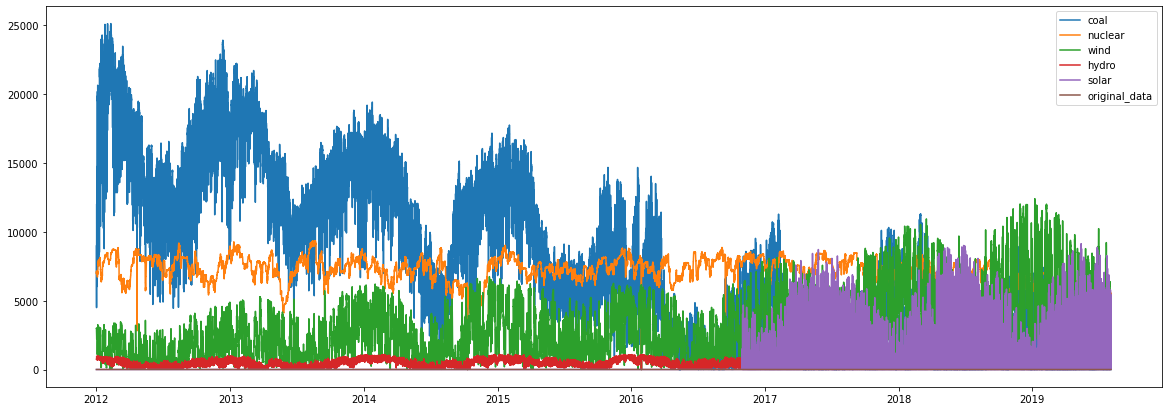

In [168]:
plt.figure(figsize=(20,7))
for col in df.columns[1:]:
    plt.plot(df["timestamp"], df[col], label=col)
plt.legend()
plt.show()

In [169]:
df.to_csv("mean_energy_use_by_hour.csv", index=False)

# II. LSTM pred

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## a) read csv

In [104]:
df = pd.read_csv("mean_energy_use_by_hour.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
print(df.shape)
display(df.head())
df.info()

(66439, 6)


,timestamp,coal,nuclear,wind,hydro,solar
0,2012-01-01 00:00:00,8962.083333,7057.083333,2992.916667,747.583333,0.0
1,2012-01-01 01:00:00,8596.166667,6942.750000,2972.833333,759.000000,0.0
2,2012-01-01 02:00:00,7701.250000,6944.916667,2934.250000,748.083333,0.0
3,2012-01-01 03:00:00,6199.083333,6944.750000,2971.166667,746.000000,0.0
4,2012-01-01 04:00:00,5361.083333,7021.250000,3002.000000,745.000000,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66439 entries, 0 to 66438
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  66439 non-null  datetime64[ns]
 1   coal       66439 non-null  float64       
 2   nuclear    66439 non-null  float64       
 3   wind       66439 non-null  float64       
 4   hydro      66439 non-null  float64       
 5   solar      66439 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 3.0 MB


## b) train test split

In [ ]:
train = df.iloc[: 228]
test = df.iloc[228: ]

In [105]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)
 
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [ ]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)